In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import abtem
import os

In [2]:
#df = pd.read_csv('./data/data_overview.csv')
#df.head()
#extract chosen data
#df1 = df.loc[df['defect_atom_symbol'] == 'O'] #single value: df_parameters.at[1,'timestamp']

### RAW

In [3]:
#import preparation
data_names = [entry for entry in os.listdir('./data') if entry.endswith('.zarr')]
measurements_list = [None] * len(data_names)

#fill measurements_list with imported data
for i in range(len(data_names)):
    path = f'./data/{data_names[i]}'
    measurements_list[i] = abtem.from_zarr(path).compute()

[########################################] | 100% Completed | 2.65 sms
[########################################] | 100% Completed | 1.44 sms
[########################################] | 100% Completed | 1.86 sms
[########################################] | 100% Completed | 1.76 sms
[########################################] | 100% Completed | 2.04 sms
[########################################] | 100% Completed | 1.54 sms
[########################################] | 100% Completed | 1.87 sms
[########################################] | 100% Completed | 2.25 sms
[########################################] | 100% Completed | 1.65 sms
[########################################] | 100% Completed | 1.64 sms
[########################################] | 100% Completed | 2.16 sms
[########################################] | 100% Completed | 1.57 sms
[########################################] | 100% Completed | 1.46 sms
[########################################] | 100% Completed | 1.45 sms
[#####

In [12]:
len(measurements_list)

20

In [4]:
#extract parameter information --> see data_names[0] for correct indices
parameter_info = ["_".join([string.split('_')[0], string.split('_')[3], (string.split('_')[5]).lstrip('filledwith')]) for string in data_names[:]]

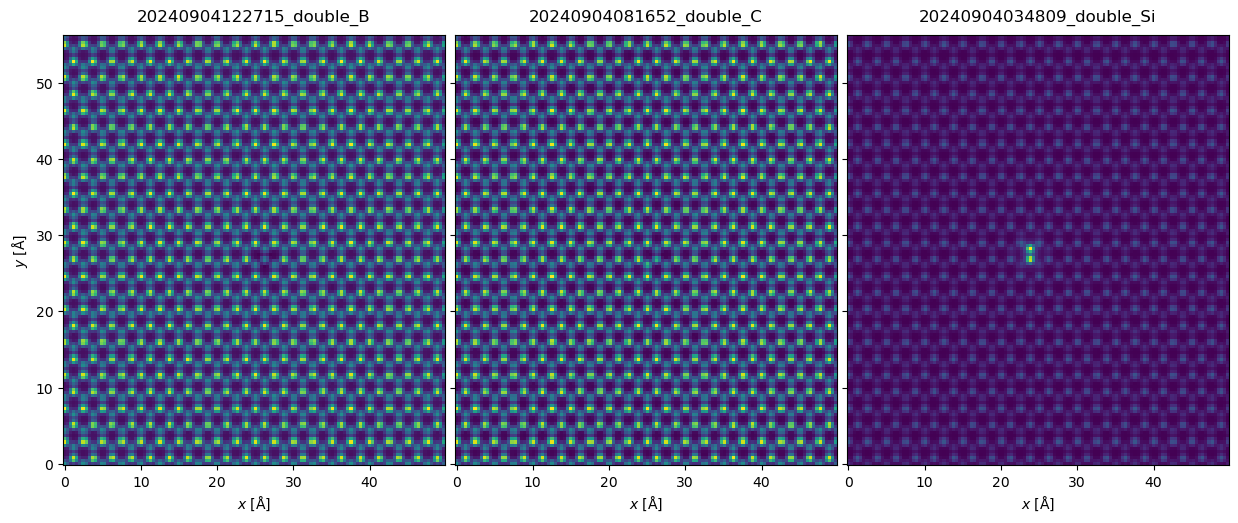

In [11]:
#plot
measurements = abtem.stack([m for m in measurements_list], parameter_info)
measurements[-3:].show(figsize=(14, 5), explode=True, cbar=False,)

#plt.ylim(25,35)
#plt.xlim(20,30)

### INTERPOLATED + GAUSS

In [6]:
#set parameters for postprocessing
#pairs: interpolate:0.01 & gauss: 0.2;  interpolate:0.05 & gauss: 0.3
#interpolate-> higher value (0.1) more pixels; low value -> smoother, more time
interpolate = 0.01
gauss = 0.3
dose = 1e6

In [7]:
#interpolate to smooth images and apply gaussian filter to consider partial spatial coherence 
final_measurements = measurements.interpolate(interpolate).gaussian_filter(gauss)

(20.0, 30.0)

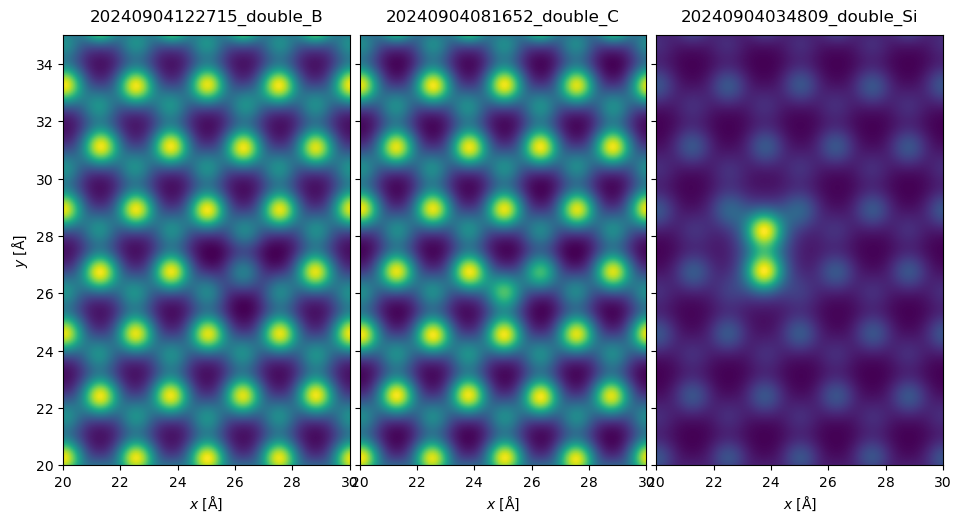

In [8]:
#plot
final_measurements_plot = abtem.stack(final_measurements, parameter_info)
final_measurements_plot[-3:].show(explode=True, figsize=(14, 5), cbar=False, common_color_scale=False)

plt.ylim(20,35)
plt.xlim(20,30)

### NOISE

In [9]:
#noise to account for finite electrone dose -> statistic deviation (see abtem walkthrough -> scan & detect)
#noisy_measurements = final_measurements.poisson_noise(dose_per_area=dose, seed=100)


In [10]:
#noisy_measurements_plot = abtem.stack(noisy_measurements, parameter_info)
#noisy_measurements_plot[5:7].show(explode=True, figsize=(12, 4))
